<a href="https://colab.research.google.com/github/kobi-2/IUT-Lab-NumMethod/blob/main/170041013_Lab03_NumMethodLab_MyCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab03 - Group 1

Task: Implementing Non Linear Polynomial Regression for the order of n. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Defining function for Non-Linear Polynomial:

In [ ]:
def nonLinearPolynomialCoefficient(t, alpha, order=2):
    n = len(t)
    a = np.zeros((order+1, order+1))
    b = np.zeros((order+1, 1))

    for i in range(order+1):
        for j in range(order+1):
            a[i][j] = np.sum(np.power(t, i+j))
    a[0][0] = n

    for i in range(order+1):
        b[i][0] = np.sum(np.power(t, i) * alpha)
    
    result = np.matmul(np.linalg.inv(a), b)
    # print(result)
    return result

### Input: 

In [ ]:
t = np.array([80, 40, -40, -120, -200, -280, -340])
alpha = np.array([6.47e-6, 6.24e-6, 5.72e-6, 5.09e-6, 4.30e-6, 3.33e-6, 2.45e-6])

### Calling function to calculate Coeffticient and printing out the result: 

In [ ]:
#@title Define order
order =  3#@param {type:"number"}

coeff_result = nonLinearPolynomialCoefficient(t,alpha, order)
print("coefficient result: \n", coeff_result)

coefficient result: 
 [[ 5.99241808e-06]
 [ 6.47662777e-09]
 [-7.38218036e-12]
 [ 1.23797271e-14]]


### Printing the Nonlinear Polynomial Expression: 

In [ ]:
print('The expression for the Nonlinear Polyomial Regression is: \n')
for i in range(len(coeff_result)):
  if i == 0:
    print(coeff_result[i,0])
  else:
    print(' + ', coeff_result[i,0], '* t ^ ', i)


The expression for the Nonlinear Polyomial Regression is: 

5.992418078444375e-06
 +  6.476627771993752e-09 * t ^  1
 +  -7.382180364072195e-12 * t ^  2
 +  1.237972714361739e-14 * t ^  3


### Function for calculating value with Nonlinear Regression, given coefficient and single input T: 

In [ ]:
def nonLinearPolynomialApprox(coefficient, t=80):
  coeff = np.array(coefficient)
  len_coeff = len(coefficient)
  
  # print('len of coeff: ', len_coeff)
  # print(coeff)

  t_new = np.ones((len_coeff,1))
  for i in range (len_coeff):
    t_new[i][0] = np.power(t,i)

  # print('len of t_new: ', len(t_new))
  # print(t_new)

  # print(coeff*t_new)
  return np.sum(coeff*t_new)


In [ ]:
#@title Input T to calculate Nonlinear Regression Approximation:  
param_t = 80 #@param {type:"number"}

apprx_result = nonLinearPolynomialApprox(coeff_result, param_t)
print('The approximated result with Nonlinear Regression model for order =', order , 'and given input t =', param_t, '  is:', apprx_result)

The approximated result with Nonlinear Regression model for order = 3 and given input t = 80   is: 6.469640766171345e-06


### Calculating Nonlinear Polynomial for all T: 

In [ ]:
nonLinearPol_results = np.zeros((len(t),1))
t_temp = np.array(t)
for i in range(len(t)):
  nonLinearPol_results[i][0] = nonLinearPolynomialApprox(coeff_result, t_temp[i])

print(nonLinearPol_results)

[[6.46964077e-06]
 [6.24046400e-06]
 [5.72074918e-06]
 [5.08752718e-06]
 [4.30276749e-06]
 [3.32843959e-06]
 [2.45041179e-06]]


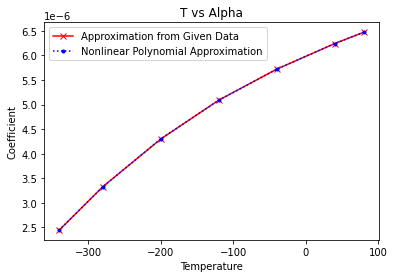

In [ ]:
plt.plot(t, alpha, label='Approximation from Given Data', color='r', marker='x', linestyle='-')
plt.plot(t,nonLinearPol_results, label = 'Nonlinear Polynomial Approximation', color='b', marker='.', linestyle=':')
plt.title('T vs Alpha')
plt.xlabel('Temperature')
plt.ylabel('Coefficient')
plt.legend()
plt.show()